In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [5]:
df=pd.read_parquet("dummy_dataset (1).parquet")

In [7]:
df

0         1         2        3        4        5  \
timestamp                                                                    
2024-01-20 11:00:00  0.1432  100.0000   99.9977  99.8983  99.6871  99.9799   
2024-01-20 11:15:00  0.1378   99.9857  100.0000  99.9107  99.7476  99.9896   
2024-01-20 11:30:00  0.1594   99.9870   99.9975  99.8961  99.6687  99.9821   
2024-01-20 11:45:00  0.1508   99.9801   99.9826  99.8883  99.6289  99.9448   
2024-01-20 12:00:00  0.1441   99.9944  100.0000  99.9168  99.6879  99.9786   
...                     ...       ...       ...      ...      ...      ...   
2024-04-23 04:45:00  0.1786   99.9940   99.9750  99.7414  99.6292  99.9410   
2024-04-23 05:00:00  0.1780   99.9908   99.9805  99.7369  99.6506  99.9598   
2024-04-23 05:15:00  0.1811   99.9981   99.9827  99.7576  99.7039  99.9668   
2024-04-23 05:30:00  0.1808   99.9981   99.9812  99.7565  99.6513  99.9644   
2024-04-23 05:45:00  0.1781   99.9936   99.9908  99.7669  99.6100  99.9716   

                           6        7        8        9  ...      21  \
timestamp                                                ...           
2024-01-20 11:00:00  99.4998  99.7612  81.6503  99.4058  ...     NaN   
2024-01-20 11:15:00  99.5512  99.8357  82.7831  99.4055  ...     NaN   
2024-01-20 11:30:00  99.5555  99.7807  82.7583  99.0942  ...     NaN   
2024-01-20 11:45:00  99.4718  99.1831  83.1814  99.4533  ...     NaN   
2024-01-20 12:00:00  99.5252  99.7798  81.4799  99.3706  ...     NaN   
...                      ...      ...      ...      ...  ...     ...   
2024-04-23 04:45:00  99.7164  99.6779  87.0288  99.3314  ...  3.3051   
2024-04-23 05:00:00  99.7265  99.6212  88.1243  99.3076  ...  3.3256   
2024-04-23 05:15:00  99.7333  99.7247  88.7372  99.3286  ...  3.3205   
2024-04-23 05:30:00  99.7300  99.6911  88.6720  99.2483  ...  3.3308   
2024-04-23 05:45:00  99.7387  99.5944  88.5737  99.2889  ...  3.3051   

                            22         23          24         25         26  \
timestamp                                                                     
2024-01-20 11:00:00        NaN        NaN         NaN        NaN        NaN   
2024-01-20 11:15:00        NaN        NaN         NaN        NaN        NaN   
2024-01-20 11:30:00        NaN        NaN         NaN        NaN        NaN   
2024-01-20 11:45:00        NaN        NaN         NaN        NaN        NaN   
2024-01-20 12:00:00        NaN        NaN         NaN        NaN        NaN   
...                        ...        ...         ...        ...        ...   
2024-04-23 04:45:00  4228.2980  4142.0314  49785.2659  8712.1636  4144.2030   
2024-04-23 05:00:00  4313.0940  4226.4443  47830.0755  8712.3459  4144.0207   
2024-04-23 05:15:00  4326.7733  4239.4762  48243.3508  8712.2982  4144.0684   
2024-04-23 05:30:00  4246.5030  4163.5819  48311.2571  8712.1885  4144.1781   
2024-04-23 05:45:00  4259.0350  4175.2784  49241.1889  8712.3715  4143.9951   

                            27        28      29       30  
timestamp                                                  
2024-01-20 11:00:00        NaN       NaN     NaN      NaN  
2024-01-20 11:15:00        NaN       NaN     NaN      NaN  
2024-01-20 11:30:00        NaN       NaN     NaN      NaN  
2024-01-20 11:45:00        NaN       NaN     NaN      NaN  
2024-01-20 12:00:00        NaN       NaN     NaN      NaN  
...                        ...       ...     ...      ...  
2024-04-23 04:45:00  1900.2624  350.3205  1.6046  32.2346  
2024-04-23 05:00:00  1887.9880  350.3205  1.6009  32.2332  
2024-04-23 05:15:00  1904.6963  350.3205  1.6053  32.2336  
2024-04-23 05:30:00  1894.3480  349.1667  1.6034  32.2344  
2024-04-23 05:45:00  1914.9414  349.7436  1.6052  32.2330  

[9004 rows x 31 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9004 entries, 2024-01-20 11:00:00 to 2024-04-23 05:45:00
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8913 non-null   float64
 1   1       8913 non-null   float64
 2   2       8913 non-null   float64
 3   3       8913 non-null   float64
 4   4       8913 non-null   float64
 5   5       8913 non-null   float64
 6   6       8913 non-null   float64
 7   7       8913 non-null   float64
 8   8       8913 non-null   float64
 9   9       8913 non-null   float64
 10  10      8913 non-null   float64
 11  11      8837 non-null   float64
 12  12      8838 non-null   float64
 13  13      8838 non-null   float64
 14  14      8837 non-null   float64
 15  15      8838 non-null   float64
 16  16      8966 non-null   float64
 17  17      8966 non-null   float64
 18  18      8966 non-null   float64
 19  19      8966 non-null   float64
 20  20      8966 non-null   float64
 21  2

In [11]:
df_desc = pd.DataFrame(df.describe())

In [13]:
df_desc

0            1            2            3            4  \
count  8913.000000  8913.000000  8913.000000  8913.000000  8913.000000   
mean      0.178851    99.991032    99.977207    99.866429    99.657123   
std       1.649268     0.030788     0.619552     0.750014     0.127774   
min       0.042100    98.887700    66.898700    64.231000    98.216000   
25%       0.134500    99.990800    99.994500    99.885800    99.603100   
50%       0.166100    99.996400    99.998000    99.907500    99.656500   
75%       0.181800   100.000000   100.000000    99.929100    99.715800   
max     155.806300   100.000000   100.000000    99.973800   100.000000   

                 5            6            7            8            9  ...  \
count  8913.000000  8913.000000  8913.000000  8913.000000  8913.000000  ...   
mean     99.933083    99.643623    99.655819    76.598045    99.388079  ...   
std       1.128261     1.301281     0.139060     5.066359     0.118435  ...   
min      43.747800    37.846900    97.750500    61.307600    98.578900  ...   
25%      99.964800    99.639700    99.604100    72.890300    99.308200  ...   
50%      99.973900    99.685900    99.658600    77.480400    99.390800  ...   
75%      99.979800    99.734100    99.718200    79.873500    99.474600  ...   
max      99.994000    99.918800   100.000000    96.056300    99.690600  ...   

                21             22             23            24            25  \
count  2002.000000    1991.000000    1995.000000   8560.000000   7899.000000   
mean      3.264465    4107.632180    4088.603207  47382.015443  10945.358995   
std       0.622106    4659.037456    4654.401843  16807.136725   3058.119870   
min       2.007900    1564.074300    1548.852400  13788.502200   7159.622300   
25%       2.847075    2946.630350    2927.734850  36331.941200   8582.542350   
50%       3.441800    4123.542100    4102.285700  49266.250850   9041.762600   
75%       3.658125    4583.674100    4568.005350  61500.476825  13220.322600   
max      11.600000  102193.400000  102192.800000  82783.541500  16991.903200   

                26           27            28            29           30  
count  7899.000000  7920.000000   7920.000000   7920.000000  7899.000000  
mean   7342.162996  2211.346825    524.997753      4.524540    40.437133  
std    1606.827160   636.998444    499.195699    134.220984     6.103775  
min    4137.985100   147.616800    216.818200      0.817300    32.057000  
25%    5967.899700  1804.894900    370.223900      1.760200    33.795000  
50%    8398.540100  2260.362950    545.491800      2.346750    40.480700  
75%    8517.863250  2646.956875    574.107100      3.386400    45.359450  
max    8697.191300  5820.516700  10000.000000  11334.673500    54.760200  

[8 rows x 31 columns]

In [15]:
nan_flavors = df.map(lambda x: type(x) if pd.isna(x) else None).stack().unique()
print("NaN flavors present:", nan_flavors)

NaN flavors present: [<class 'float'>]


In [17]:
data = pd.DataFrame(df)
def nan_flavors_in_column(column):
    nan_flavors = column.apply(lambda x: type(x) if pd.isna(x) else None).unique()
    return nan_flavors
nan_flavors_per_column = {col: nan_flavors_in_column(data[col]) for col in data.columns}
print("NaN flavors in each column:\n")
for col, flavors in nan_flavors_per_column.items():
    print(f"{col}: {flavors}")


NaN flavors in each column:

0: [None <class 'float'>]
1: [None <class 'float'>]
2: [None <class 'float'>]
3: [None <class 'float'>]
4: [None <class 'float'>]
5: [None <class 'float'>]
6: [None <class 'float'>]
7: [None <class 'float'>]
8: [None <class 'float'>]
9: [None <class 'float'>]
10: [None <class 'float'>]
11: [<class 'float'> None]
12: [<class 'float'> None]
13: [<class 'float'> None]
14: [<class 'float'> None]
15: [<class 'float'> None]
16: [<class 'float'> None]
17: [<class 'float'> None]
18: [<class 'float'> None]
19: [<class 'float'> None]
20: [<class 'float'> None]
21: [<class 'float'> None]
22: [<class 'float'> None]
23: [<class 'float'> None]
24: [<class 'float'> None]
25: [<class 'float'> None]
26: [<class 'float'> None]
27: [<class 'float'> None]
28: [<class 'float'> None]
29: [<class 'float'> None]
30: [<class 'float'> None]


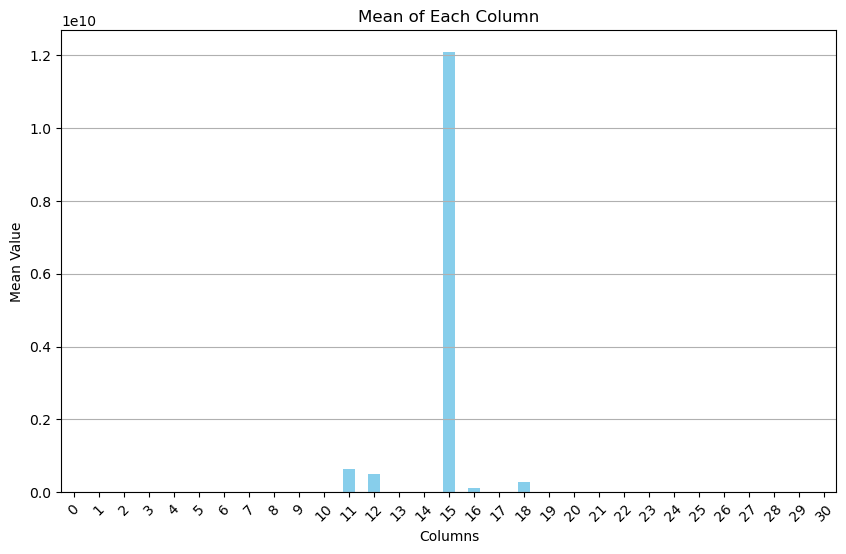

In [19]:
#representation of the mean of each column
data = pd.DataFrame(df)
mean_values = data.mean()
plt.figure(figsize=(10, 6))  
mean_values.plot(kind='bar', color='skyblue')
plt.title('Mean of Each Column')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)  
plt.grid(axis='y')
plt.show()

In [20]:
mean_column_16 = df['16'].mean()
print(mean_column_16)

107716107.99888468


In [23]:
mean_column_15 = df['15'].mean()
print(mean_column_15)

12083162657.199932


In [25]:
mean_column_0 = df['0'].mean()
print(mean_column_0)

0.1788512958599798


In [27]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30'],
      dtype='object')

In [29]:
df.isnull().sum()

0       91
1       91
2       91
3       91
4       91
5       91
6       91
7       91
8       91
9       91
10      91
11     167
12     166
13     166
14     167
15     166
16      38
17      38
18      38
19      38
20      38
21    7002
22    7013
23    7009
24     444
25    1105
26    1105
27    1084
28    1084
29    1084
30    1105
dtype: int64

In [31]:
data_count=9004

In [33]:

(df.isnull().sum()/data_count)*100


0      1.010662
1      1.010662
2      1.010662
3      1.010662
4      1.010662
5      1.010662
6      1.010662
7      1.010662
8      1.010662
9      1.010662
10     1.010662
11     1.854731
12     1.843625
13     1.843625
14     1.854731
15     1.843625
16     0.422035
17     0.422035
18     0.422035
19     0.422035
20     0.422035
21    77.765438
22    77.887606
23    77.843181
24     4.931142
25    12.272323
26    12.272323
27    12.039094
28    12.039094
29    12.039094
30    12.272323
dtype: float64

In [35]:
#NAN further investigate and which flavour
#1.imputation
#for inputation we first need to analyze the data

In [37]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

In [39]:
means = df.mean()

# Fill missing values with the calculated means
df = df.fillna(means)

print(df)

                          0         1         2        3        4        5  \
timestamp                                                                    
2024-01-20 11:00:00  0.1432  100.0000   99.9977  99.8983  99.6871  99.9799   
2024-01-20 11:15:00  0.1378   99.9857  100.0000  99.9107  99.7476  99.9896   
2024-01-20 11:30:00  0.1594   99.9870   99.9975  99.8961  99.6687  99.9821   
2024-01-20 11:45:00  0.1508   99.9801   99.9826  99.8883  99.6289  99.9448   
2024-01-20 12:00:00  0.1441   99.9944  100.0000  99.9168  99.6879  99.9786   
...                     ...       ...       ...      ...      ...      ...   
2024-04-23 04:45:00  0.1786   99.9940   99.9750  99.7414  99.6292  99.9410   
2024-04-23 05:00:00  0.1780   99.9908   99.9805  99.7369  99.6506  99.9598   
2024-04-23 05:15:00  0.1811   99.9981   99.9827  99.7576  99.7039  99.9668   
2024-04-23 05:30:00  0.1808   99.9981   99.9812  99.7565  99.6513  99.9644   
2024-04-23 05:45:00  0.1781   99.9936   99.9908  99.7669  99.610

In [41]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
dtype: int64

In [43]:
df.head(10)

0         1         2        3        4        5  \
timestamp                                                                    
2024-01-20 11:00:00  0.1432  100.0000   99.9977  99.8983  99.6871  99.9799   
2024-01-20 11:15:00  0.1378   99.9857  100.0000  99.9107  99.7476  99.9896   
2024-01-20 11:30:00  0.1594   99.9870   99.9975  99.8961  99.6687  99.9821   
2024-01-20 11:45:00  0.1508   99.9801   99.9826  99.8883  99.6289  99.9448   
2024-01-20 12:00:00  0.1441   99.9944  100.0000  99.9168  99.6879  99.9786   
2024-01-20 12:15:00  0.1371  100.0000   99.9970  99.9098  99.5787  99.9736   
2024-01-20 12:30:00  0.1355  100.0000   99.9962  99.9076  99.7029  99.9639   
2024-01-20 12:45:00  0.1354   99.9909  100.0000  99.9015  99.5739  99.9818   
2024-01-20 13:00:00  0.1365   99.9895   99.9976  99.9157  99.7095  99.9746   
2024-01-20 13:15:00  0.1303  100.0000  100.0000  99.9175  99.5830  99.9882   

                           6        7        8        9  ...        21  \
timestamp                                                ...             
2024-01-20 11:00:00  99.4998  99.7612  81.6503  99.4058  ...  3.264465   
2024-01-20 11:15:00  99.5512  99.8357  82.7831  99.4055  ...  3.264465   
2024-01-20 11:30:00  99.5555  99.7807  82.7583  99.0942  ...  3.264465   
2024-01-20 11:45:00  99.4718  99.1831  83.1814  99.4533  ...  3.264465   
2024-01-20 12:00:00  99.5252  99.7798  81.4799  99.3706  ...  3.264465   
2024-01-20 12:15:00  99.5557  99.6627  82.8083  99.4439  ...  3.264465   
2024-01-20 12:30:00  99.5879  99.7454  84.1667  99.1014  ...  3.264465   
2024-01-20 12:45:00  99.6013  99.6910  82.8019  99.1823  ...  3.264465   
2024-01-20 13:00:00  99.5368  99.7715  82.6763  99.3695  ...  3.264465   
2024-01-20 13:15:00  99.5595  99.6962  83.8259  99.4065  ...  3.264465   

                             22           23            24            25  \
timestamp                                                                  
2024-01-20 11:00:00  4107.63218  4088.603207  47382.015443  10945.358995   
2024-01-20 11:15:00  4107.63218  4088.603207  47382.015443  10945.358995   
2024-01-20 11:30:00  4107.63218  4088.603207  47382.015443  10945.358995   
2024-01-20 11:45:00  4107.63218  4088.603207  47382.015443  10945.358995   
2024-01-20 12:00:00  4107.63218  4088.603207  47382.015443  10945.358995   
2024-01-20 12:15:00  4107.63218  4088.603207  47382.015443  10945.358995   
2024-01-20 12:30:00  4107.63218  4088.603207  47382.015443  10945.358995   
2024-01-20 12:45:00  4107.63218  4088.603207  47382.015443  10945.358995   
2024-01-20 13:00:00  4107.63218  4088.603207  47382.015443  10945.358995   
2024-01-20 13:15:00  4107.63218  4088.603207  47382.015443  10945.358995   

                              26           27          28       29         30  
timestamp                                                                      
2024-01-20 11:00:00  7342.162996  2211.346825  524.997753  4.52454  40.437133  
2024-01-20 11:15:00  7342.162996  2211.346825  524.997753  4.52454  40.437133  
2024-01-20 11:30:00  7342.162996  2211.346825  524.997753  4.52454  40.437133  
2024-01-20 11:45:00  7342.162996  2211.346825  524.997753  4.52454  40.437133  
2024-01-20 12:00:00  7342.162996  2211.346825  524.997753  4.52454  40.437133  
2024-01-20 12:15:00  7342.162996  2211.346825  524.997753  4.52454  40.437133  
2024-01-20 12:30:00  7342.162996  2211.346825  524.997753  4.52454  40.437133  
2024-01-20 12:45:00  7342.162996  2211.346825  524.997753  4.52454  40.437133  
2024-01-20 13:00:00  7342.162996  2211.346825  524.997753  4.52454  40.437133  
2024-01-20 13:15:00  7342.162996  2211.346825  524.997753  4.52454  40.437133  

[10 rows x 31 columns]

In [45]:
df_desc = pd.DataFrame(df.describe())
df_desc

0            1            2            3            4  \
count  9004.000000  9004.000000  9004.000000  9004.000000  9004.000000   
mean      0.178851    99.991032    99.977207    99.866429    99.657123   
std       1.640912     0.030632     0.616412     0.746213     0.127127   
min       0.042100    98.887700    66.898700    64.231000    98.216000   
25%       0.134900    99.990900    99.994400    99.884900    99.603700   
50%       0.166500    99.996300    99.997900    99.907150    99.657123   
75%       0.181625   100.000000   100.000000    99.928900    99.714825   
max     155.806300   100.000000   100.000000    99.973800   100.000000   

                 5            6            7            8            9  ...  \
count  9004.000000  9004.000000  9004.000000  9004.000000  9004.000000  ...   
mean     99.933083    99.643623    99.655819    76.598045    99.388079  ...   
std       1.122545     1.294688     0.138355     5.040690     0.117835  ...   
min      43.747800    37.846900    97.750500    61.307600    98.578900  ...   
25%      99.964400    99.640200    99.604800    72.955550    99.308900  ...   
50%      99.973800    99.684900    99.657650    77.424300    99.389300  ...   
75%      99.979800    99.733600    99.717500    79.847625    99.473600  ...   
max      99.994000    99.918800   100.000000    96.056300    99.690600  ...   

                21             22             23            24            25  \
count  9004.000000    9004.000000    9004.000000   9004.000000   9004.000000   
mean      3.264465    4107.632180    4088.603207  47382.015443  10945.358995   
std       0.293288    2190.428669    2190.447395  16387.459114   2864.306208   
min       2.007900    1564.074300    1548.852400  13788.502200   7159.622300   
25%       3.264465    4107.632180    4088.603207  37516.768650   8592.993350   
50%       3.264465    4107.632180    4088.603207  47945.516700   9982.840300   
75%       3.264465    4107.632180    4088.603207  60888.130600  12440.622800   
max      11.600000  102193.400000  102192.800000  82783.541500  16991.903200   

                26           27            28            29           30  
count  9004.000000  9004.000000   9004.000000   9004.000000  9004.000000  
mean   7342.162996  2211.346825    524.997753      4.524540    40.437133  
std    1504.991696   597.420220    468.179487    125.881516     5.716938  
min    4137.985100   147.616800    216.818200      0.817300    32.057000  
25%    5995.832100  1928.333100    370.895500      1.814850    33.968075  
50%    8237.213550  2211.346825    539.112900      2.716050    40.437133  
75%    8502.832250  2568.827500    567.982500      3.957975    44.442150  
max    8697.191300  5820.516700  10000.000000  11334.673500    54.760200  

[8 rows x 31 columns]

In [47]:
kurtosis_values = df.kurtosis()
for column_name, kurtosis_value in kurtosis_values.items():
    if kurtosis_value > 0:
        
        imputed_value = df[column_name].median()
        print(f"For column '{column_name}': Using median ({imputed_value}) for imputation.")
    else:

        imputed_value = df[column_name].mean()
        print(f"For column '{column_name}': Using mean ({imputed_value}) for imputation.")

For column '0': Using median (0.1665) for imputation.
For column '1': Using median (99.9963) for imputation.
For column '2': Using median (99.9979) for imputation.
For column '3': Using median (99.90715) for imputation.
For column '4': Using median (99.65712284303827) for imputation.
For column '5': Using median (99.9738) for imputation.
For column '6': Using median (99.6849) for imputation.
For column '7': Using median (99.65765) for imputation.
For column '8': Using mean (76.59804469875462) for imputation.
For column '9': Using median (99.3893) for imputation.
For column '10': Using median (91.00265) for imputation.
For column '11': Using mean (637822857.2389258) for imputation.
For column '12': Using mean (508262219.27319485) for imputation.
For column '13': Using median (2076.0) for imputation.
For column '14': Using mean (0.664029783863302) for imputation.
For column '15': Using mean (12083162657.199932) for imputation.
For column '16': Using median (119287663.0) for imputation.
F

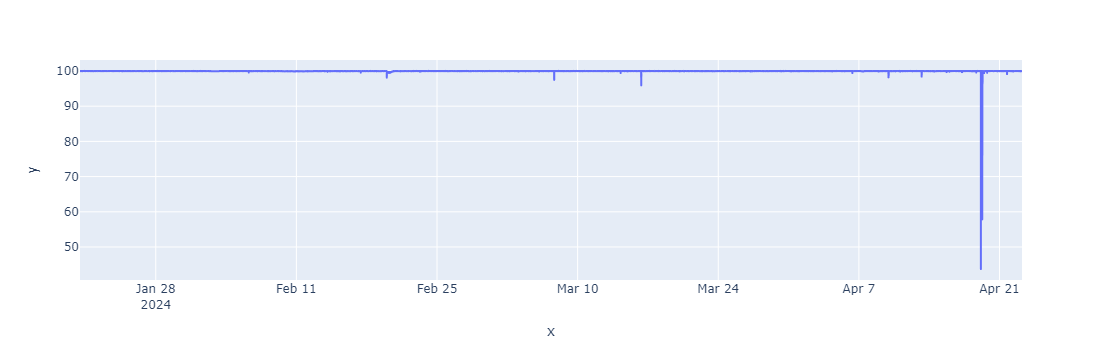

In [67]:
import plotly.express as px
fig = px.line(x=df.index, y=df['5'])
fig.show()

In [50]:
from sklearn.preprocessing import MinMaxScaler
scale_norm = MinMaxScaler()
scale_norm.fit_transform(df)
my_df_normalised = pd.DataFrame(scale_norm.fit_transform(df), columns = df.columns)

In [51]:
my_df_normalised

0         1         2         3         4         5         6  \
0     0.000649  1.000000  0.999931  0.997888  0.824608  0.999749  0.993250   
1     0.000614  0.987144  1.000000  0.998235  0.858520  0.999922  0.994078   
2     0.000753  0.988313  0.999924  0.997826  0.814294  0.999788  0.994147   
3     0.000698  0.982109  0.999474  0.997608  0.791984  0.999125  0.992799   
4     0.000655  0.994965  1.000000  0.998405  0.825056  0.999726  0.993659   
...        ...       ...       ...       ...       ...       ...       ...   
8999  0.000876  0.994606  0.999245  0.993498  0.792152  0.999058  0.996739   
9000  0.000872  0.991729  0.999411  0.993372  0.804148  0.999392  0.996902   
9001  0.000892  0.998292  0.999477  0.993951  0.834025  0.999516  0.997012   
9002  0.000890  0.998292  0.999432  0.993920  0.804540  0.999474  0.996958   
9003  0.000873  0.994246  0.999722  0.994211  0.781390  0.999602  0.997099   

             7         8         9  ...        21        22        23  \
0     0.893843  0.585423  0.743816  ...  0.131000  0.025277  0.025235   
1     0.926962  0.618023  0.743546  ...  0.131000  0.025277  0.025235   
2     0.902512  0.617309  0.463524  ...  0.131000  0.025277  0.025235   
3     0.636853  0.629485  0.786543  ...  0.131000  0.025277  0.025235   
4     0.902112  0.580520  0.712153  ...  0.131000  0.025277  0.025235   
...        ...       ...       ...  ...       ...       ...       ...   
8999  0.856813  0.740206  0.676891  ...  0.135236  0.026476  0.025766   
9000  0.831607  0.771732  0.655483  ...  0.137373  0.027318  0.026605   
9001  0.877617  0.789371  0.674373  ...  0.136842  0.027454  0.026734   
9002  0.862681  0.787494  0.602141  ...  0.137916  0.026657  0.025980   
9003  0.819693  0.784665  0.638662  ...  0.135236  0.026781  0.026096   

            24        25        26        27        28        29        30  
0     0.486898  0.385031  0.702793  0.363787  0.031501  0.000327  0.369117  
1     0.486898  0.385031  0.702793  0.363787  0.031501  0.000327  0.369117  
2     0.486898  0.385031  0.702793  0.363787  0.031501  0.000327  0.369117  
3     0.486898  0.385031  0.702793  0.363787  0.031501  0.000327  0.369117  
4     0.486898  0.385031  0.702793  0.363787  0.031501  0.000327  0.369117  
...        ...       ...       ...       ...       ...       ...       ...  
8999  0.521730  0.157902  0.001364  0.308951  0.013646  0.000069  0.007823  
9000  0.493392  0.157921  0.001324  0.306787  0.013646  0.000069  0.007761  
9001  0.499382  0.157916  0.001334  0.309732  0.013646  0.000070  0.007779  
9002  0.500366  0.157905  0.001358  0.307908  0.013528  0.000069  0.007814  
9003  0.513844  0.157924  0.001318  0.311538  0.013587  0.000070  0.007752  

[9004 rows x 31 columns]

In [52]:
from sklearn.preprocessing import MinMaxScaler
scale_norm = MinMaxScaler()
scale_norm.fit_transform(df)
my_df_normalised = pd.DataFrame(scale_norm.fit_transform(df), columns = df.columns)
x=my_df_normalised.iloc[:,0]
x


0       0.000649
1       0.000614
2       0.000753
3       0.000698
4       0.000655
          ...   
8999    0.000876
9000    0.000872
9001    0.000892
9002    0.000890
9003    0.000873
Name: 0, Length: 9004, dtype: float64

In [33]:
y=my_df_normalised.iloc[:,18]
y

0       0.188337
1       0.188337
2       0.209140
3       0.206700
4       0.209959
          ...   
8999    0.246308
9000    0.240275
9001    0.230414
9002    0.236419
9003    0.237537
Name: 18, Length: 9004, dtype: float64

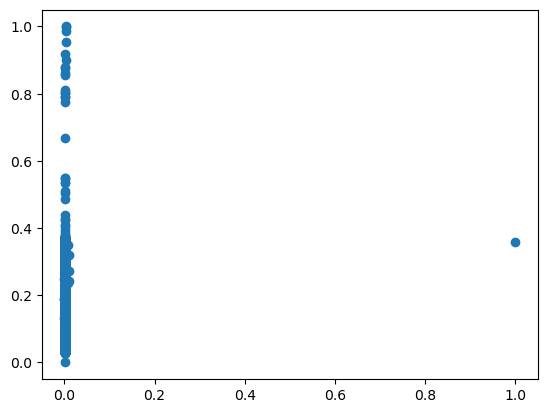

In [34]:
plt.scatter(x,y)

In [35]:
from sklearn.preprocessing import StandardScaler
scale_standard = StandardScaler()
scale_standard.fit_transform(df)
my_df_standardised = pd.DataFrame(scale_standard.fit_transform(df), columns = df.columns)


In [36]:
x=my_df_standardised.iloc[:,0]
x

0      -0.021728
1      -0.025019
2      -0.011855
3      -0.017096
4      -0.021179
          ...   
8999   -0.000153
9000   -0.000519
9001    0.001370
9002    0.001188
9003   -0.000458
Name: 0, Length: 9004, dtype: float64

In [37]:
y=my_df_standardised.iloc[:,19]
y

0       0.000000
1       0.000000
2       0.159747
3       0.104593
4       0.142242
          ...   
8999    0.736783
9000    0.702189
9001    0.599362
9002    0.652917
9003    0.652564
Name: 19, Length: 9004, dtype: float64

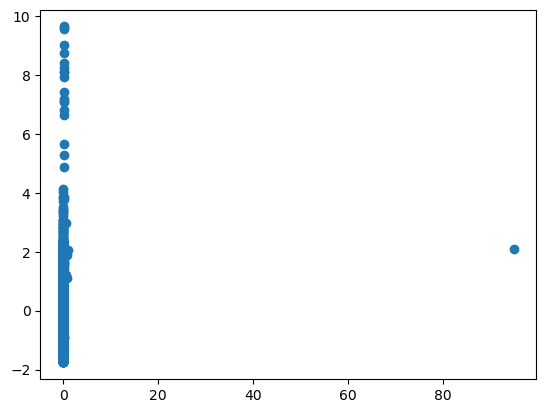

In [38]:
plt.scatter(x,y)

In [39]:
x = my_df_normalised.loc[my_df_normalised['0'] < 0.001, '0']

# Display the retrieved data
print(x)

0       0.000649
1       0.000614
2       0.000753
3       0.000698
4       0.000655
          ...   
8999    0.000876
9000    0.000872
9001    0.000892
9002    0.000890
9003    0.000873
Name: 0, Length: 8365, dtype: float64


In [40]:
y = my_df_normalised.loc[:, '18']

# Display the retrieved data
print(y)

0       0.188337
1       0.188337
2       0.209140
3       0.206700
4       0.209959
          ...   
8999    0.246308
9000    0.240275
9001    0.230414
9002    0.236419
9003    0.237537
Name: 18, Length: 9004, dtype: float64


In [41]:
df_desc['19']

count    9.004000e+03
mean     1.773696e+06
std      6.930369e+05
min      5.549790e+05
25%      1.211758e+06
50%      1.933799e+06
75%      2.202412e+06
max      8.455985e+06
Name: 19, dtype: float64

C:\Users\tulia\AppData\Local\Temp\ipykernel_2852\61919586.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




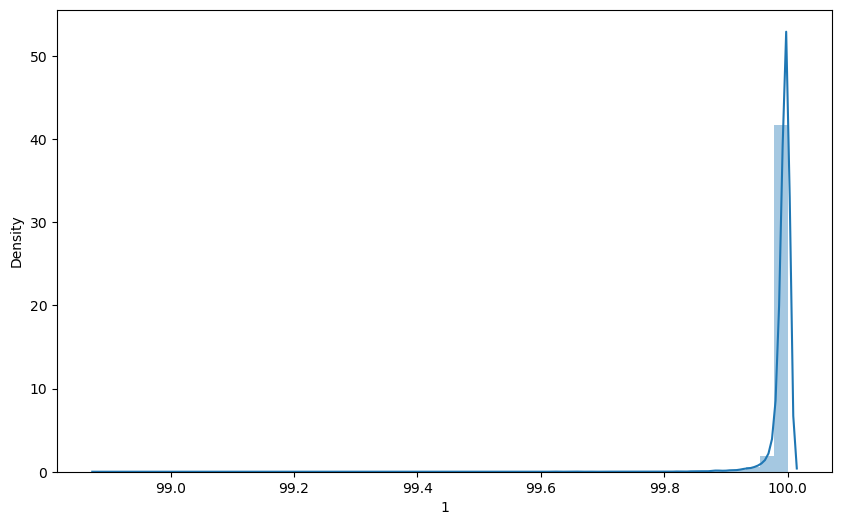

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.distplot(df['1'])
plt.show()

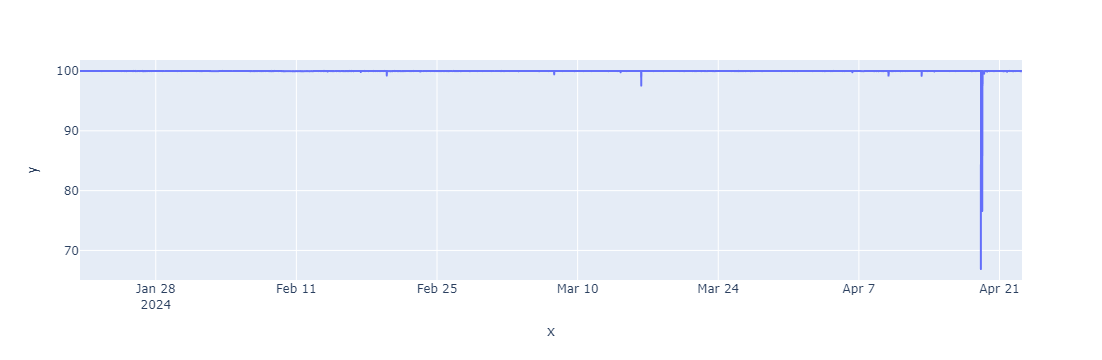

In [43]:
import plotly.express as px
fig = px.line(x=df.index, y=df['2'])
fig.show()

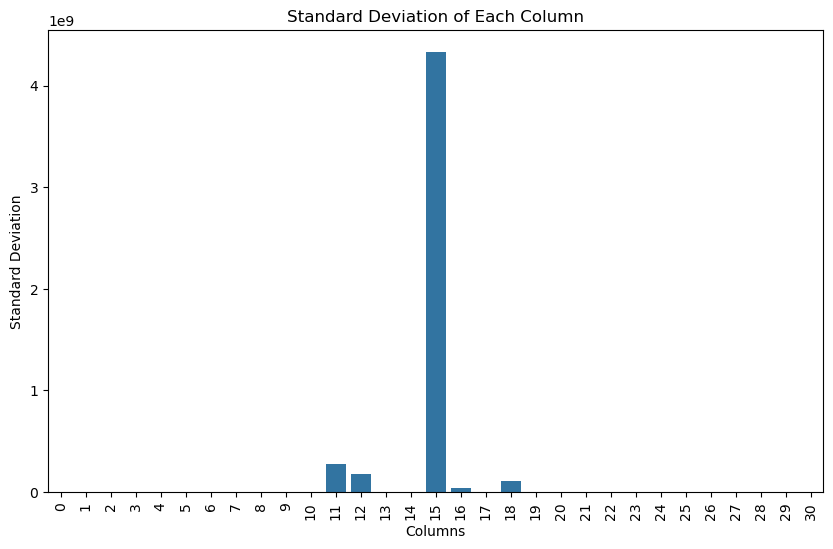

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
std_devs = df.std()

# Step 3: Plot the standard deviations
plt.figure(figsize=(10, 6))
sns.barplot(x=std_devs.index, y=std_devs.values)
plt.xlabel('Columns')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Each Column')
plt.xticks(rotation=90)  # Rotate column names if they overlap
plt.show()

In [45]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
print(pd.__version__)

2.2.2


In [47]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


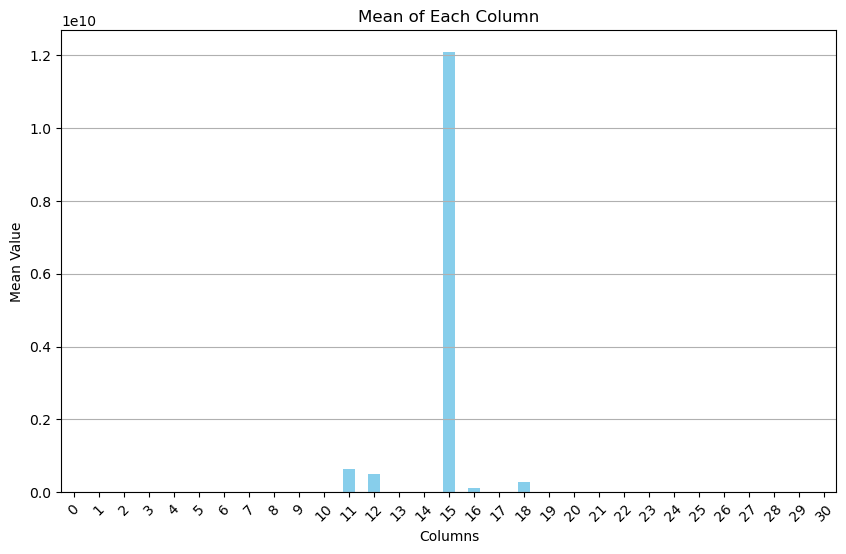

In [48]:
data = pd.DataFrame(df)
mean_values = data.mean()
plt.figure(figsize=(10, 6))  
mean_values.plot(kind='bar', color='skyblue')
plt.title('Mean of Each Column')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)  
plt.grid(axis='y')
plt.show()

In [49]:

Q1 = df['1'].quantile(0.25)
Q3 = df['1'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['1'] < (Q1 - 1.5 * IQR)) | (df['1'] > (Q3 + 1.5 * IQR))]
print(outliers)

                          0        1         2        3        4        5  \
timestamp                                                                   
2024-01-20 15:45:00  0.1169  99.9387   99.9970  99.8905  99.6012  99.9607   
2024-01-20 16:45:00  0.1088  99.9631   99.9952  99.9094  99.8737  99.9736   
2024-01-20 19:00:00  0.1081  99.8843  100.0000  99.9305  99.4301  99.9624   
2024-01-20 22:30:00  0.1460  99.9769  100.0000  99.9206  99.6474  99.9773   
2024-01-21 00:15:00  0.1565  99.9585  100.0000  99.9183  99.7286  99.9862   
...                     ...      ...       ...      ...      ...      ...   
2024-04-22 13:45:00  0.1597  99.9563   99.9983  99.8274  99.5604  99.9821   
2024-04-22 18:30:00  0.1204  99.7312  100.0000  99.9101  99.6901  99.9814   
2024-04-22 18:45:00  0.1246  99.9349  100.0000  99.8886  99.7533  99.9855   
2024-04-22 20:30:00  0.1491  99.9735  100.0000  99.8875  99.7503  99.9799   
2024-04-22 20:45:00  0.1642  99.9537  100.0000  99.8981  99.5685  99.9868   

In [50]:
Q1 = df['2'].quantile(0.25)
Q3 = df['2'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['2'] < (Q1 - 1.5 * IQR)) | (df['2'] > (Q3 + 1.5 * IQR))]
print(outliers)

                          0         1        2        3        4        5  \
timestamp                                                                   
2024-01-20 11:45:00  0.1508   99.9801  99.9826  99.8883  99.6289  99.9448   
2024-01-22 15:15:00  0.1187  100.0000  99.9734  99.8773  99.5575  99.9641   
2024-01-24 09:45:00  0.1657   99.9968  99.9859  99.9062  99.6410  99.9451   
2024-01-24 23:15:00  0.1875   99.9784  99.9814  99.9019  99.6757  99.9466   
2024-01-25 02:45:00  0.1603   99.9869  99.9857  99.8721  99.6972  99.9647   
...                     ...       ...      ...      ...      ...      ...   
2024-04-23 04:30:00  0.1865   99.9959  99.9754  99.7658  99.6703  99.9580   
2024-04-23 04:45:00  0.1786   99.9940  99.9750  99.7414  99.6292  99.9410   
2024-04-23 05:00:00  0.1780   99.9908  99.9805  99.7369  99.6506  99.9598   
2024-04-23 05:15:00  0.1811   99.9981  99.9827  99.7576  99.7039  99.9668   
2024-04-23 05:30:00  0.1808   99.9981  99.9812  99.7565  99.6513  99.9644   

In [51]:
std_dev_column_20 = df['20'].std()
print(std_dev_column_20)

1028628.4349030848


In [53]:
z_scores = df.apply(stats.zscore)
threshold = 3  
outlier_counts = (abs(z_scores) > threshold).sum()
print("Number of outliers in each column:")
print(outlier_counts)

NameError: name 'stats' is not defined

Text(0, 0.5, 'Parameter')

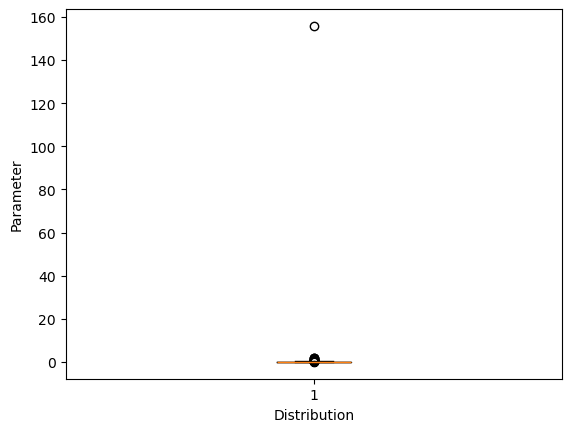

In [54]:
plt.boxplot(df["0"])
plt.xlabel("Distribution")
plt.ylabel("Parameter")

Text(0, 0.5, 'Parameter')

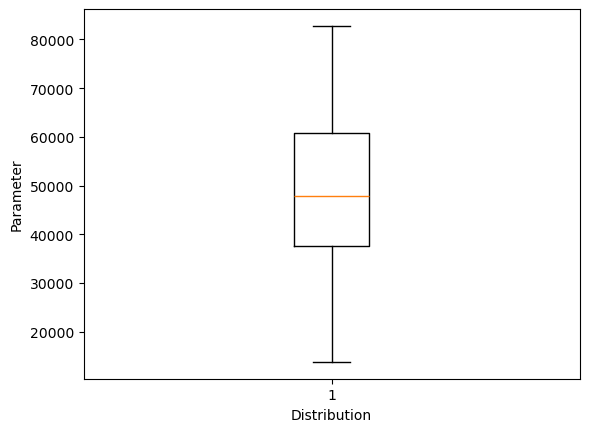

In [55]:
plt.boxplot(df["24"])
plt.xlabel("Distribution")
plt.ylabel("Parameter")

Text(0, 0.5, 'Parameter')

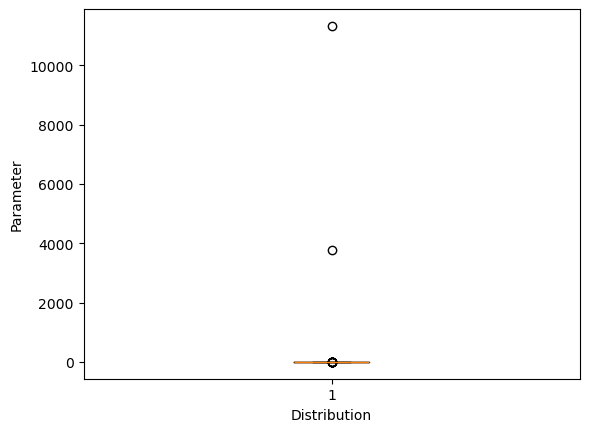

In [56]:
plt.boxplot(df["29"])
plt.xlabel("Distribution")
plt.ylabel("Parameter")

Text(0, 0.5, 'Parameter')

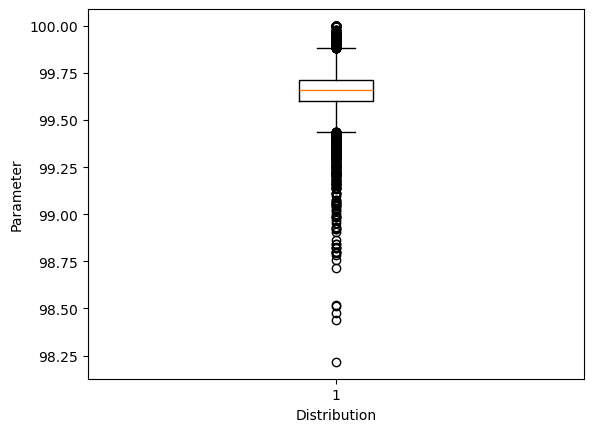

In [57]:
plt.boxplot(df["4"])
plt.xlabel("Distribution")
plt.ylabel("Parameter")

In [58]:
q1 = df['0'].quantile(0.25)
q2 = df['0'].quantile(0.75)
iqr=q2-q1
upper_limit = q2 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  elif value < lower_limit:
    return lower_limit
  else:
    return value
df['0'] = df['0'].apply(limit_imputer)

{'whiskers': [<matplotlib.lines.Line2D at 0x22567819310>,
 'caps': [<matplotlib.lines.Line2D at 0x2256787da90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2256781b200>],
 'medians': [<matplotlib.lines.Line2D at 0x2256787d220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2256787e210>],
 'means': []}

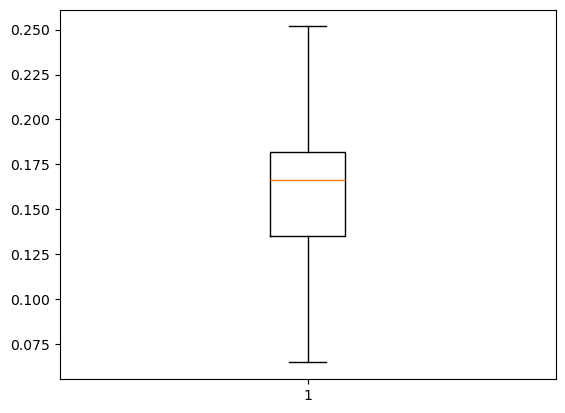

In [59]:
plt.boxplot(df["0"])

In [60]:
q1 = df['18'].quantile(0.25)
q2 = df['18'].quantile(0.75)
iqr=q2-q1
upper_limit = q2 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  elif value < lower_limit:
    return lower_limit
  else:
    return value
df['18'] = df['18'].apply(limit_imputer)

{'whiskers': [<matplotlib.lines.Line2D at 0x2256547e480>,
 'caps': [<matplotlib.lines.Line2D at 0x22563ab5160>,
 'boxes': [<matplotlib.lines.Line2D at 0x225676de870>],
 'medians': [<matplotlib.lines.Line2D at 0x225655dfbc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225656f5790>],
 'means': []}

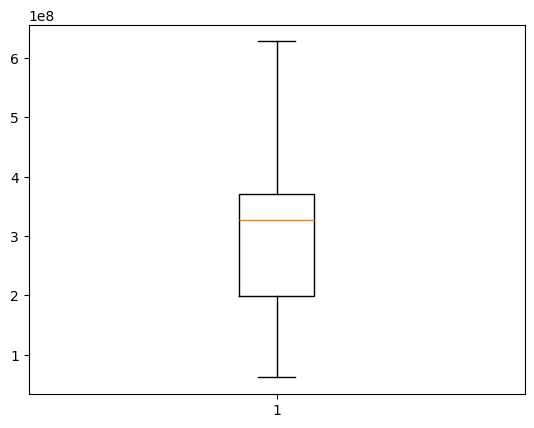

In [61]:
plt.boxplot(df["18"])

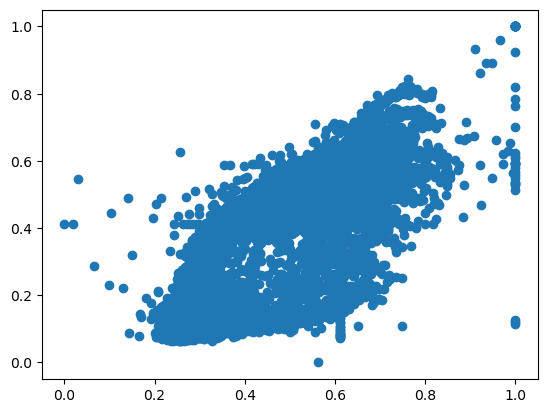

In [62]:
from sklearn.preprocessing import MinMaxScaler
scale_norm = MinMaxScaler()
scale_norm.fit_transform(df)
my_df_normalised = pd.DataFrame(scale_norm.fit_transform(df), columns = df.columns)
x=my_df_normalised.iloc[:,0]
y=my_df_normalised.iloc[:,18]
plt.scatter(x,y)

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['0'], model='additive', period=96)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


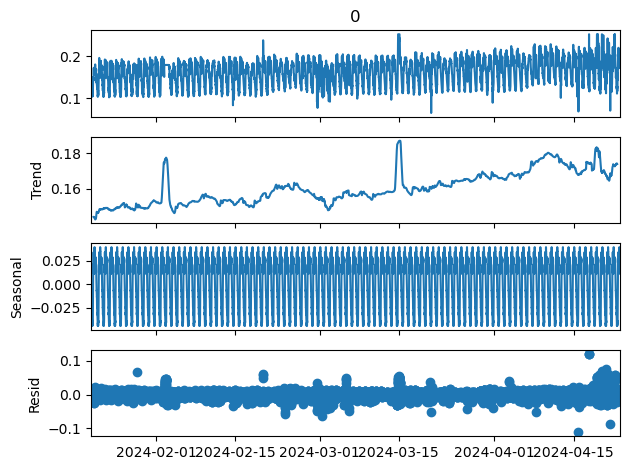

<Figure size 3200x3800 with 0 Axes>

In [64]:
  # Adjust the width and height as needed

# Plot the decomposition
figure=decomposition.plot()
plt.figure(figsize=(32, 38))

# Show the plot
plt.show()

In [65]:
threshold = 2 * np.std(residual.dropna())

outliers = np.abs(residual) > threshold


In [66]:
cleaned_data = df.copy()
cleaned_data.loc[outliers, cleaned_data.columns[0]] = np.nan  # Use loc to set outliers in column 0 to NaN

# Interpolate missing values in the first column
cleaned_data.iloc[:, 0] = cleaned_data.iloc[:, 0].interpolate()

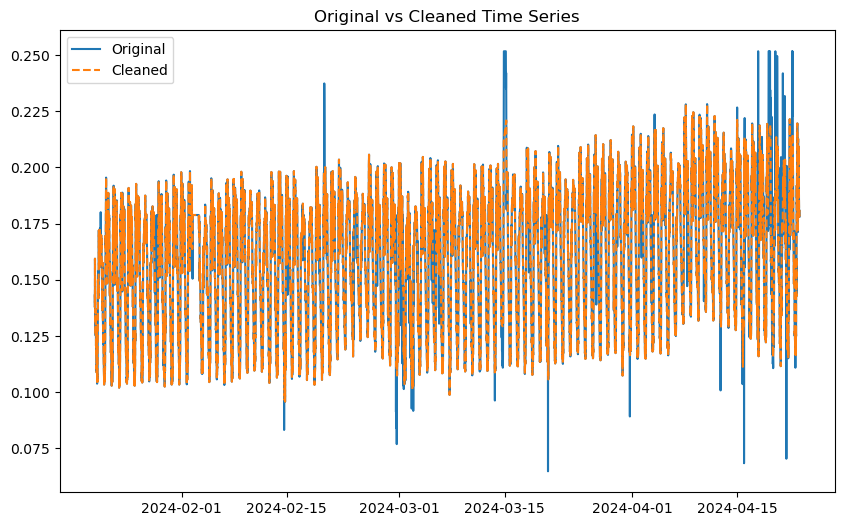

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(df['0'], label='Original')
plt.plot(cleaned_data.iloc[:, 0], label='Cleaned', linestyle='--')
plt.legend(loc='upper left')
plt.title('Original vs Cleaned Time Series')
plt.show()

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
decomposition = seasonal_decompose(df['19'], model='additive', period=96)

In [69]:
cleaned_data = df.copy()
cleaned_data.loc[outliers, cleaned_data.columns[19]] = np.nan  # Use loc to set outliers in column 0 to NaN

# Interpolate missing values in the first column
cleaned_data.iloc[:, 19] = cleaned_data.iloc[:, 19].interpolate()

In [70]:
threshold = 2* np.std(residual.dropna())

outliers = np.abs(residual) > threshold


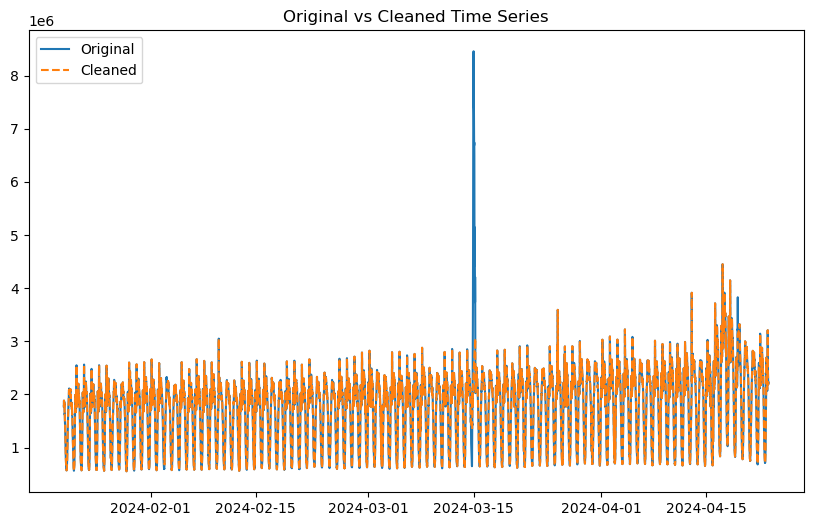

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(df['19'], label='Original')
plt.plot(cleaned_data.iloc[:, 19], label='Cleaned', linestyle='--')
plt.legend(loc='upper left')
plt.title('Original vs Cleaned Time Series')
plt.show()

In [72]:
from sklearn.preprocessing import MinMaxScaler
scale_norm = MinMaxScaler()
scale_norm.fit_transform(df)
my_df_normalised = pd.DataFrame(scale_norm.fit_transform(df), columns = df.columns)

In [73]:
x=my_df_normalised.iloc[:,0]
x

0       0.419409
1       0.390516
2       0.506086
3       0.460072
4       0.424224
          ...   
8999    0.608815
9000    0.605605
9001    0.622191
9002    0.620586
9003    0.606140
Name: 0, Length: 9004, dtype: float64

In [74]:
y=my_df_normalised.iloc[:,18]
y

0       0.411803
1       0.411803
2       0.457289
3       0.451954
4       0.459081
          ...   
8999    0.538557
9000    0.525366
9001    0.503806
9002    0.516936
9003    0.519381
Name: 18, Length: 9004, dtype: float64

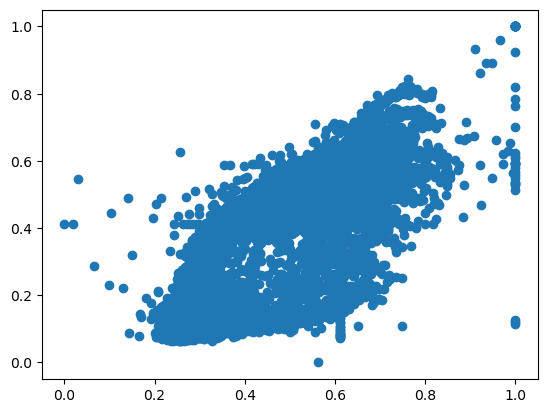

In [75]:
plt.scatter(x,y)

In [76]:
from sklearn.preprocessing import StandardScaler
scale_standard = StandardScaler()
scale_standard.fit_transform(df)
my_df_standardised = pd.DataFrame(scale_standard.fit_transform(df), columns = df.columns)

In [77]:
x=my_df_standardised.iloc[:,0]
x

0      -0.583828
1      -0.767741
2      -0.032088
3      -0.324987
4      -0.553176
          ...   
8999    0.621827
9000    0.601392
9001    0.706972
9002    0.696754
9003    0.604798
Name: 0, Length: 9004, dtype: float64

In [78]:
y=my_df_standardised.iloc[:,18]
y

0       0.009555
1       0.009555
2       0.252863
3       0.224327
4       0.262447
          ...   
8999    0.687573
9000    0.617012
9001    0.501687
9002    0.571921
9003    0.584996
Name: 18, Length: 9004, dtype: float64

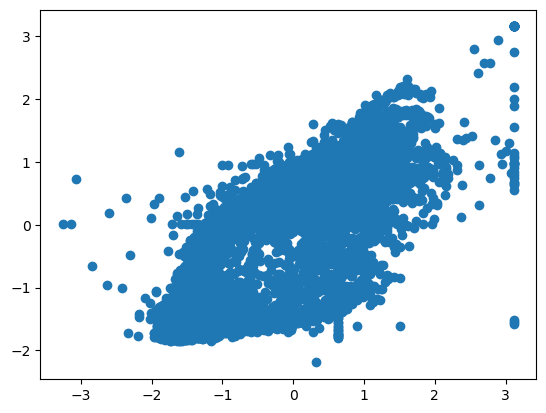

In [79]:
plt.scatter(x,y)

In [80]:
df['18']

timestamp
2024-01-20 11:00:00    2.948029e+08
2024-01-20 11:15:00    2.948029e+08
2024-01-20 11:30:00    3.205720e+08
2024-01-20 11:45:00    3.175496e+08
2024-01-20 12:00:00    3.215869e+08
                           ...     
2024-04-23 04:45:00    3.666127e+08
2024-04-23 05:00:00    3.591394e+08
2024-04-23 05:15:00    3.469252e+08
2024-04-23 05:30:00    3.543638e+08
2024-04-23 05:45:00    3.557486e+08
Name: 18, Length: 9004, dtype: float64

In [81]:
df.corr()

0         1         2         3         4         5         6  \
0   1.000000 -0.012884 -0.090383 -0.140714 -0.118733 -0.091816 -0.103277   
1  -0.012884  1.000000  0.001875 -0.000777  0.226506  0.001783  0.003751   
2  -0.090383  0.001875  1.000000  0.843654  0.080530  0.995185  0.962138   
3  -0.140714 -0.000777  0.843654  1.000000  0.079506  0.833603  0.814059   
4  -0.118733  0.226506  0.080530  0.079506  1.000000  0.082516  0.095770   
5  -0.091816  0.001783  0.995185  0.833603  0.082516  1.000000  0.969031   
6  -0.103277  0.003751  0.962138  0.814059  0.095770  0.969031  1.000000   
7  -0.062742  0.182245  0.059282  0.055048  0.883963  0.064291  0.062531   
8   0.618775 -0.025578 -0.091670 -0.155168 -0.128653 -0.092307 -0.111918   
9  -0.350211 -0.010064  0.034249  0.035988  0.140946  0.038682  0.054019   
10 -0.012639 -0.038602  0.244973  0.240929  0.026822  0.261865  0.249076   
11 -0.095541 -0.000360  0.052157  0.085286 -0.032060  0.052825  0.047067   
12 -0.233024  0.011363  0.047880  0.085651  0.041723  0.047479  0.029015   
13  0.634437 -0.034920 -0.053495 -0.101875 -0.155592 -0.054315 -0.058943   
14  0.150925 -0.011387 -0.048841 -0.063799 -0.023012 -0.050001 -0.032473   
15 -0.239381  0.010873  0.047400  0.085168  0.044034  0.046961  0.028536   
16  0.721029 -0.040134 -0.034843 -0.066587 -0.244424 -0.036106 -0.055431   
17  0.707320 -0.036200 -0.057470 -0.102401 -0.245318 -0.059165 -0.080062   
18  0.735398 -0.036679 -0.037405 -0.070621 -0.250015 -0.038831 -0.060764   
19  0.707853 -0.040220 -0.054161 -0.096570 -0.244729 -0.055713 -0.073903   
20  0.328764 -0.020355 -0.028228 -0.050381 -0.168721 -0.028690 -0.046395   
21  0.287755 -0.039130 -0.047737 -0.058523 -0.155200 -0.047900 -0.064122   
22  0.075831 -0.007754 -0.019603 -0.027891 -0.038934 -0.019410 -0.023574   
23  0.075677 -0.007707 -0.019888 -0.027857 -0.038879 -0.019727 -0.023858   
24  0.400623 -0.044958 -0.004750 -0.027022 -0.267643 -0.005428 -0.029466   
25 -0.171555  0.032655  0.018947  0.040883  0.048730  0.017769  0.012474   
26 -0.208474  0.003621  0.058476  0.105187  0.031452  0.057402  0.046404   
27  0.444069 -0.019094  0.005493  0.000264 -0.157375  0.004080 -0.016693   
28 -0.043574  0.006255  0.009739  0.017725 -0.019434  0.009641  0.006816   
29 -0.014223  0.000359  0.000663  0.001232 -0.006644  0.000627  0.000147   
30 -0.025865 -0.029388  0.041494  0.067175 -0.021082  0.041812  0.035994   

           7         8         9  ...        21        22        23        24  \
0  -0.062742  0.618775 -0.350211  ...  0.287755  0.075831  0.075677  0.400623   
1   0.182245 -0.025578 -0.010064  ... -0.039130 -0.007754 -0.007707 -0.044958   
2   0.059282 -0.091670  0.034249  ... -0.047737 -0.019603 -0.019888 -0.004750   
3   0.055048 -0.155168  0.035988  ... -0.058523 -0.027891 -0.027857 -0.027022   
4   0.883963 -0.128653  0.140946  ... -0.155200 -0.038934 -0.038879 -0.267643   
5   0.064291 -0.092307  0.038682  ... -0.047900 -0.019410 -0.019727 -0.005428   
6   0.062531 -0.111918  0.054019  ... -0.064122 -0.023574 -0.023858 -0.029466   
7   1.000000 -0.065311  0.099345  ... -0.108219 -0.025817 -0.025978 -0.198680   
8  -0.065311  1.000000 -0.508619  ...  0.194724  0.069774  0.068381  0.463855   
9   0.099345 -0.508619  1.000000  ... -0.278459 -0.072912 -0.072575 -0.403138   
10  0.032152 -0.112132  0.617842  ... -0.089629 -0.027665 -0.027956 -0.013905   
11 -0.033608 -0.296962  0.049158  ...  0.035135 -0.002715 -0.002053  0.125500   
12  0.020147 -0.158609 -0.088263  ...  0.011758 -0.001062 -0.000815 -0.093261   
13 -0.101247  0.512827 -0.378879  ...  0.313678  0.077892  0.077569  0.523558   
14 -0.022924  0.036809  0.032830  ... -0.007867 -0.016668 -0.015572  0.058559   
15  0.022760 -0.154069 -0.093503  ...  0.011329 -0.001021 -0.000793 -0.096387   
16 -0.170959  0.605528 -0.530109  ...  0.390252  0.099194  0.098852  0.773187   
17 -0.169227  0.671453 -0.552927  ...  0.402115  0.103985  0.103373  0.803881   
18 -0.172677  0.641991 -0.581503  ...  

In [87]:
from statsmodels.tsa.seasonal import STL
df_s = pd.DataFrame()
df_t = pd.DataFrame()
df_r = pd.DataFrame()

for col in df.columns:
    s = STL(df[col].ffill().bfill(),period=96,robust=True).fit()
    
    df_s[col] = s.seasonal
    df_t[col] = s.trend
    df_r[col] = s.resid

In [88]:
print("Seasonal Components:")
print(df_s)

print("\nTrend Components:")
print(df_t)

print("\nResidual Components:")
print(df_r)

Seasonal Components:
                            0         1         2         3         4  \
timestamp                                                               
2024-01-20 11:00:00 -0.005192  0.006515 -0.000852 -0.012292 -0.021827   
2024-01-20 11:15:00 -0.010272 -0.008675  0.000650  0.002979  0.079778   
2024-01-20 11:30:00  0.010442 -0.006692 -0.001177 -0.005920 -0.015733   
2024-01-20 11:45:00  0.002197 -0.011894 -0.000011 -0.021384 -0.010456   
2024-01-20 12:00:00 -0.002941  0.000078  0.000505  0.003928  0.008209   
...                       ...       ...       ...       ...       ...   
2024-04-23 04:45:00  0.007277 -0.000039 -0.040183  0.008561 -0.033515   
2024-04-23 05:00:00  0.016848 -0.003113 -0.019123  0.013625 -0.035104   
2024-04-23 05:15:00  0.009935  0.004030 -0.018639  0.031821  0.016640   
2024-04-23 05:30:00  0.007505  0.004342 -0.018857  0.029556 -0.009363   
2024-04-23 05:45:00  0.004939 -0.000089 -0.024152  0.034953 -0.044428   

                            5

C:\Users\tulia\AppData\Local\Temp\ipykernel_2852\1584493573.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



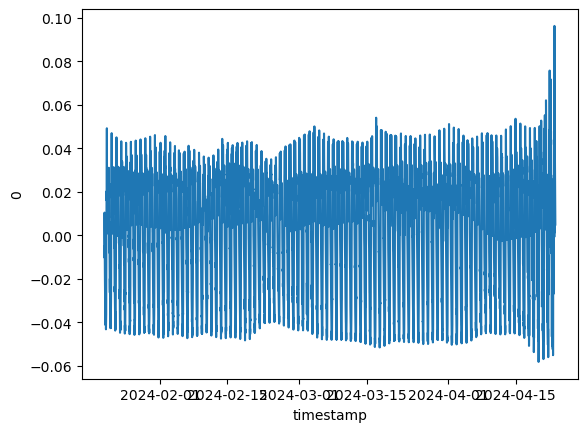

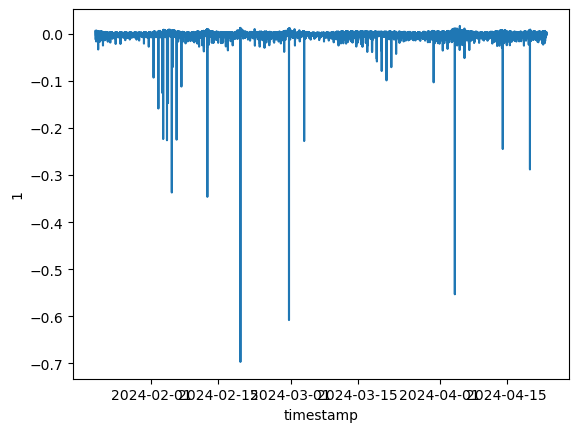

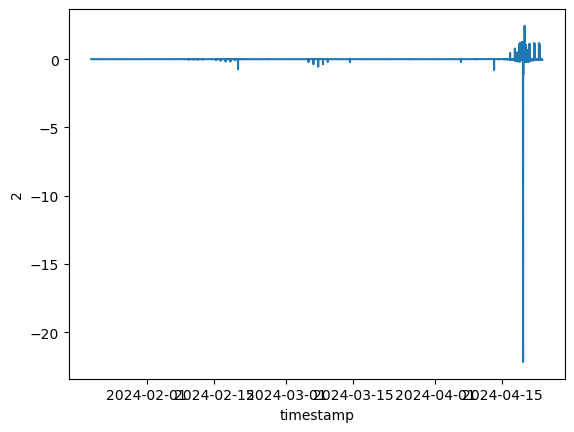

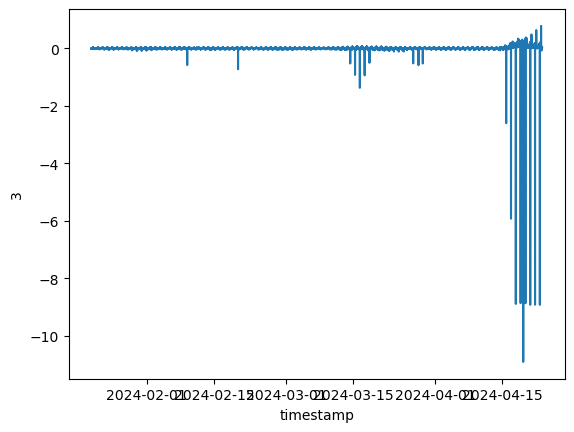

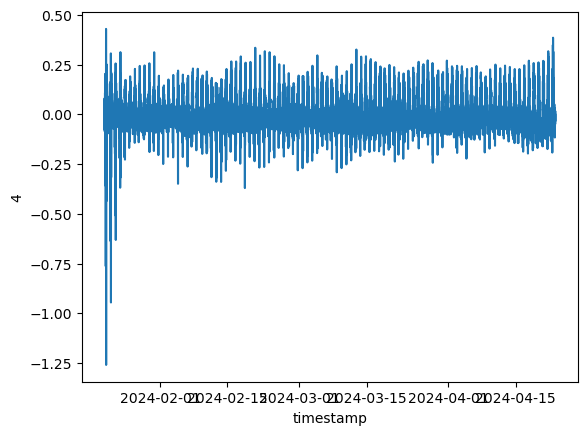

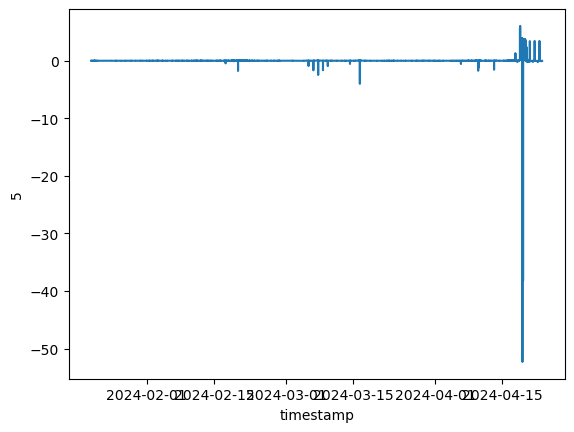

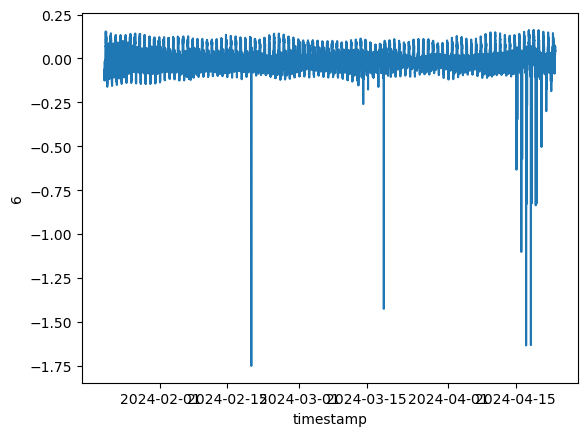

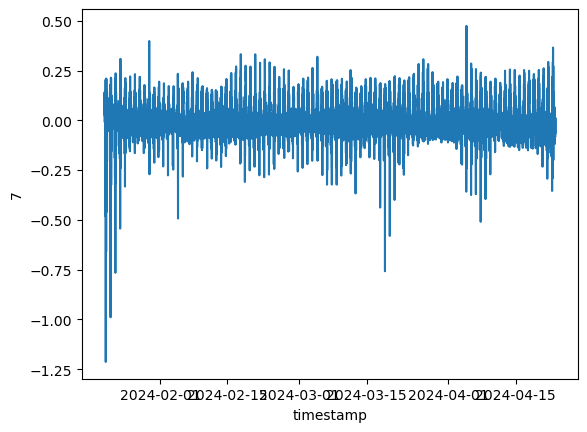

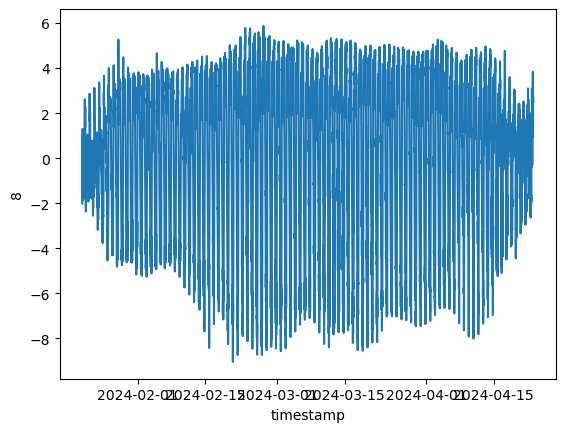

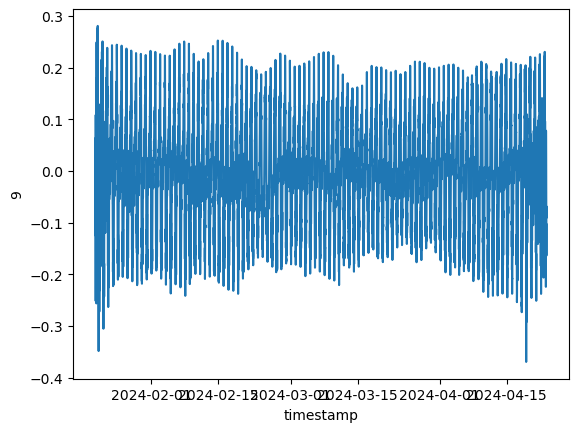

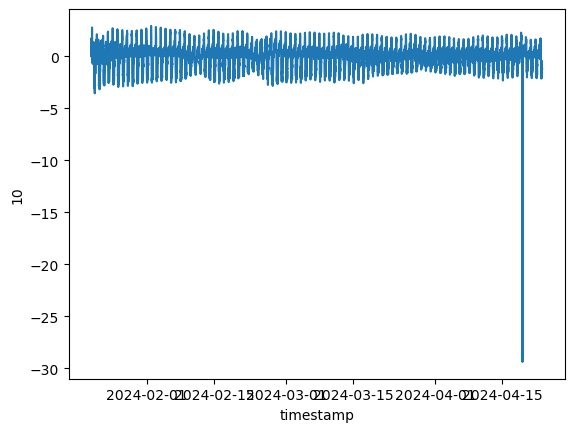

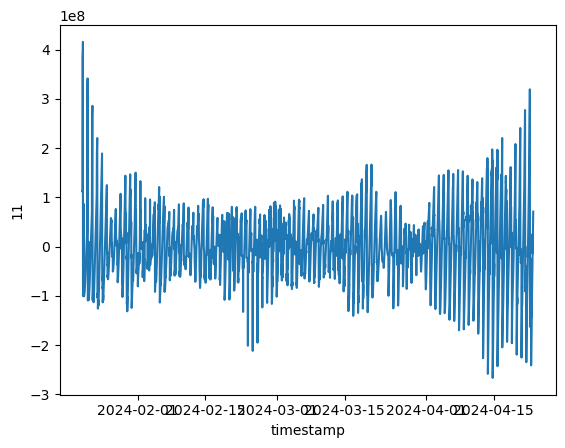

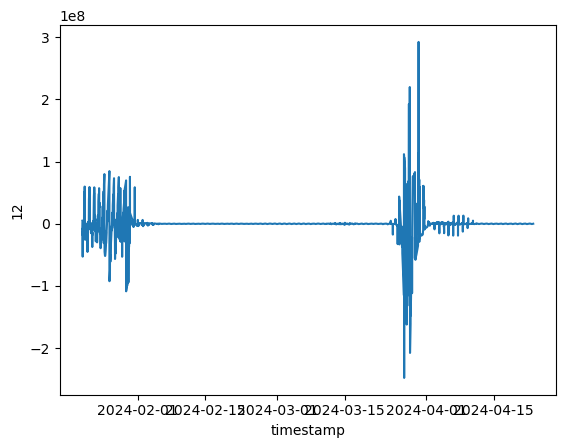

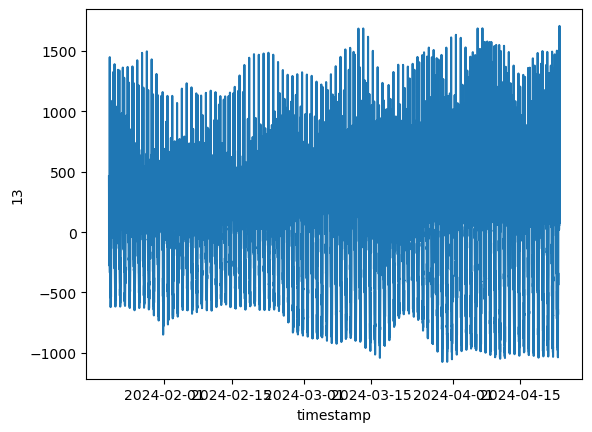

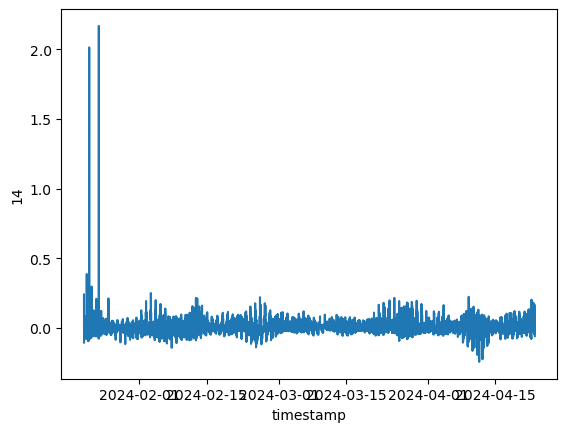

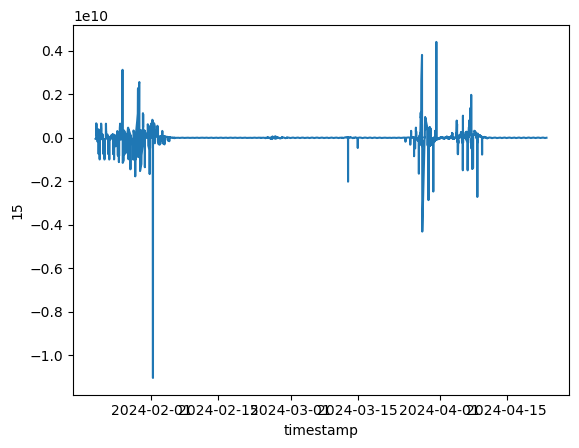

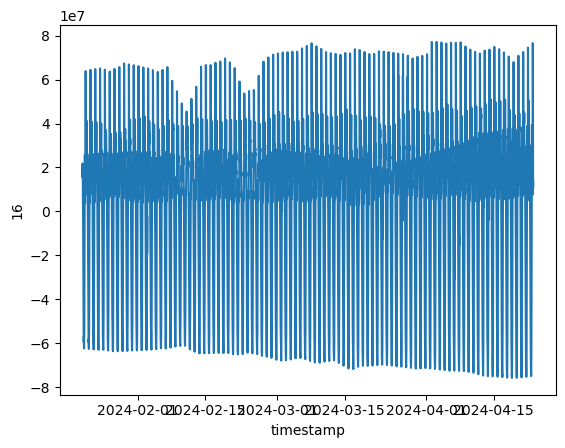

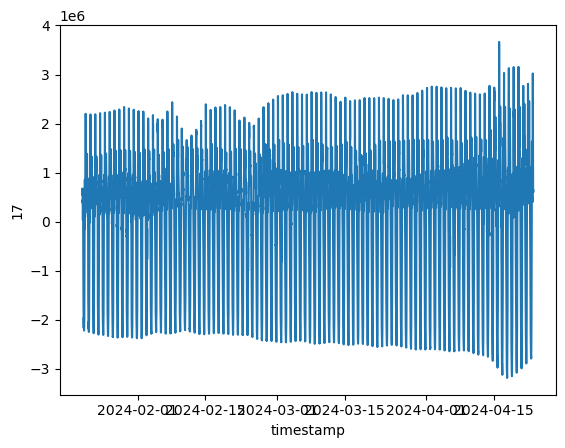

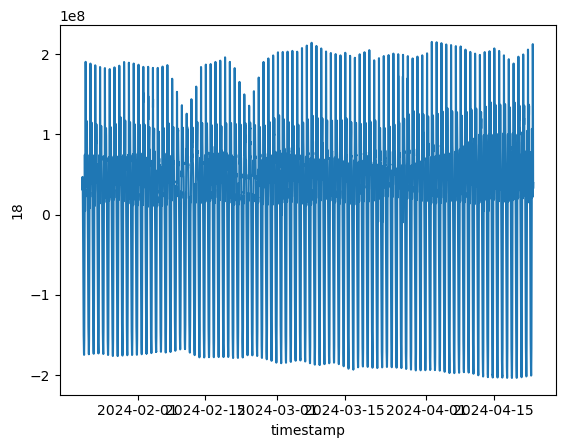

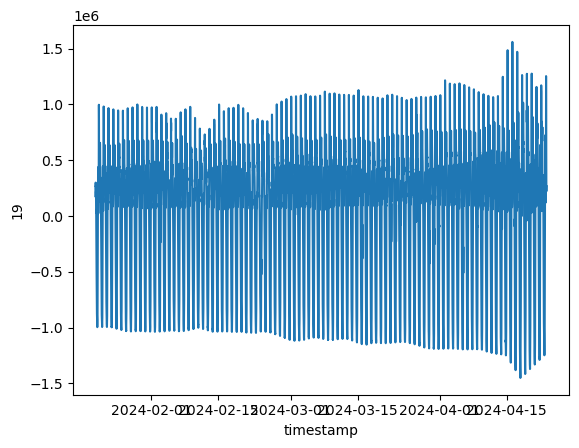

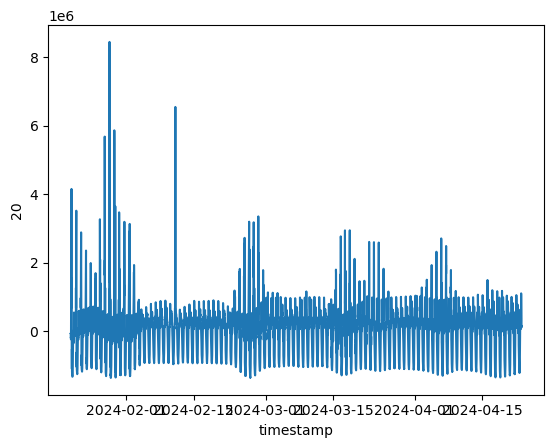

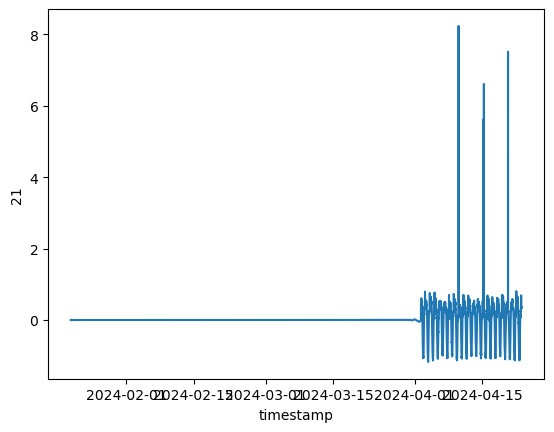

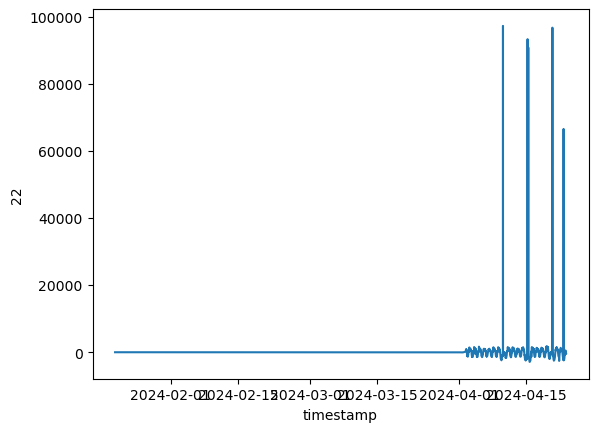

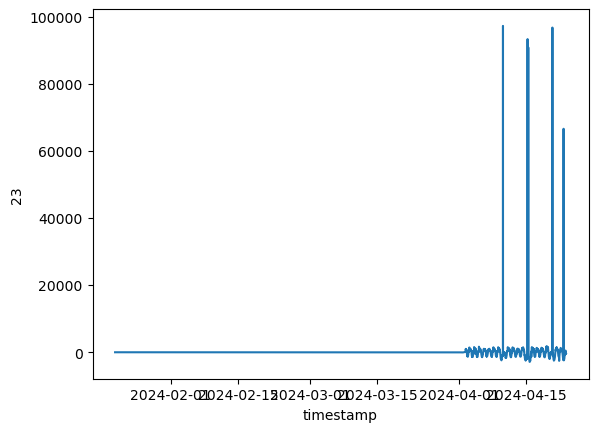

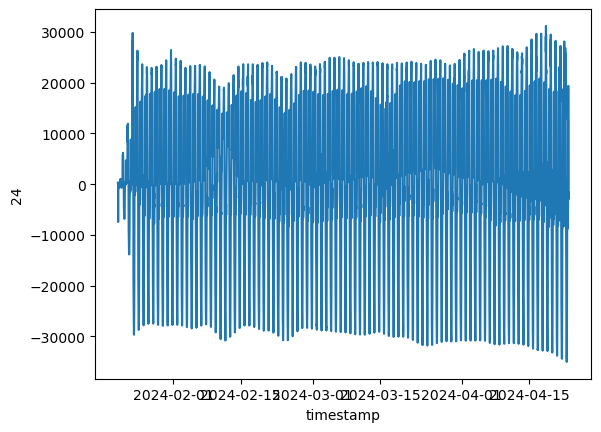

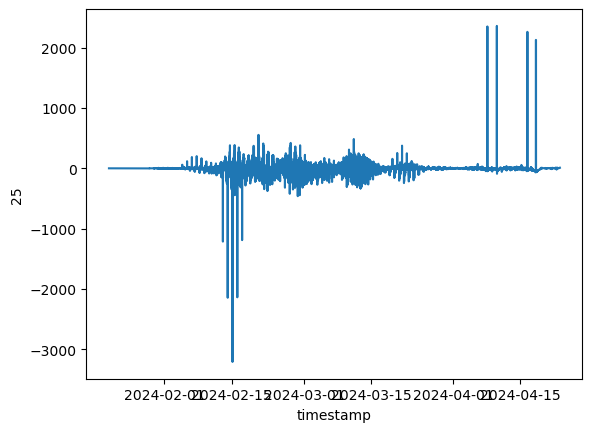

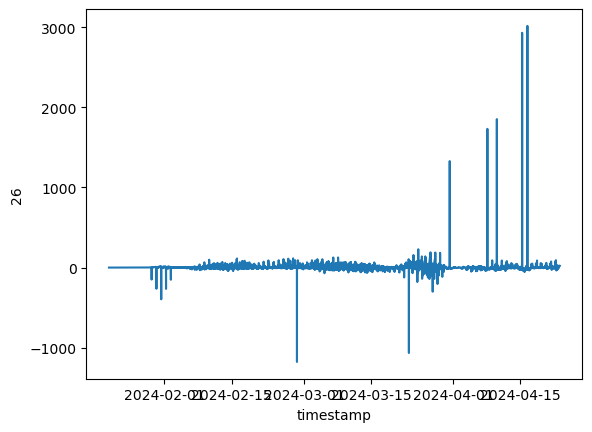

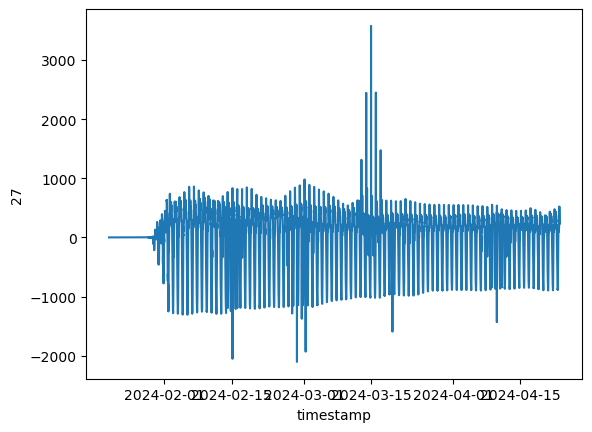

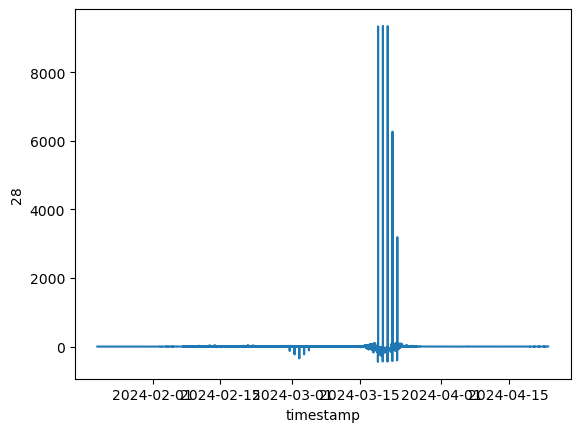

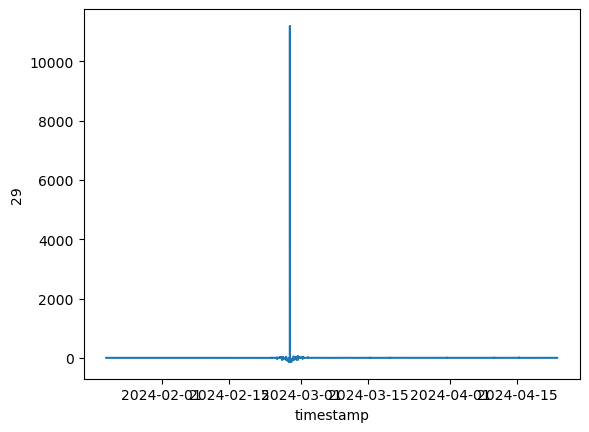

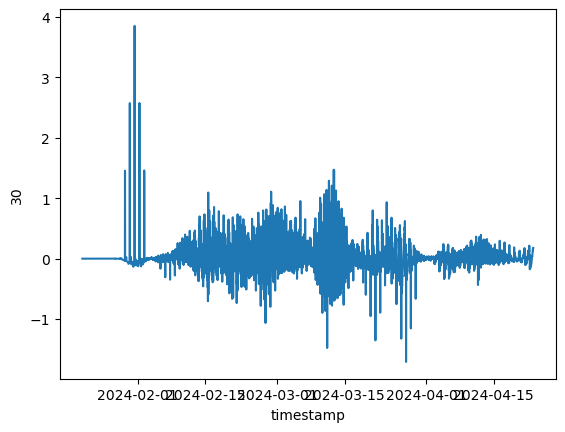

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_r is correctly populated with residuals from STL decomposition
for i, col in enumerate(df_s.columns):
    plt.figure(i)
    sns.lineplot(x=df_s.index, y=df_s[col])


In [91]:
import plotly
fig = px.line(df_r, x=df_r.index, y=df_r.columns)
plotly.offline.plot(fig, filename='norm_new_full.html')

C:\Users\tulia\anaconda3\lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



'norm_new_full.html'

In [96]:
import plotly
fig = px.line(df_s, x=df_s.index, y=df_s.columns)
plotly.offline.plot(fig, filename='norm_seasonal.html')

C:\Users\tulia\anaconda3\lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



'norm_seasonal.html'

In [93]:
import plotly
fig = px.line(df_t, x=df_t.index, y=df_t.columns)
plotly.offline.plot(fig, filename='norm_trend.html')

C:\Users\tulia\anaconda3\lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



'norm_trend.html'

C:\Users\tulia\AppData\Local\Temp\ipykernel_32476\4132107319.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



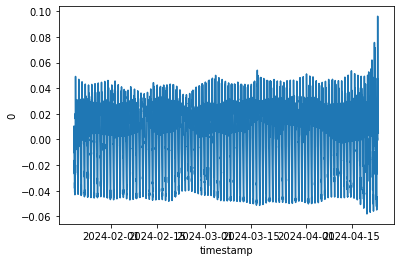

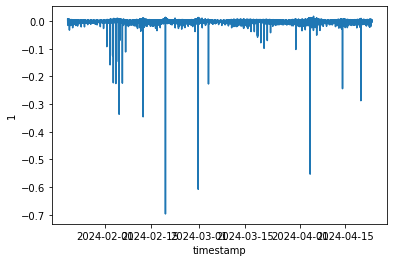

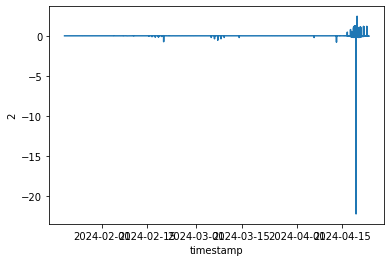

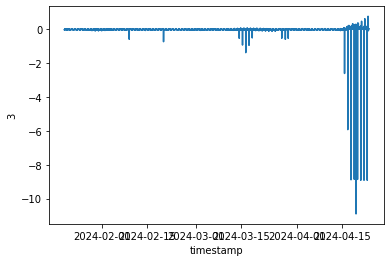

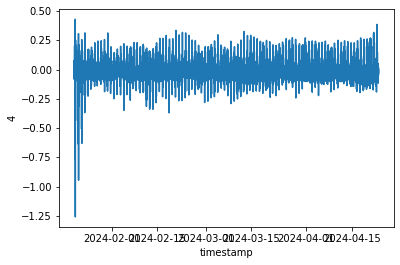

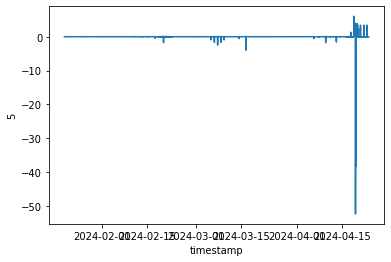

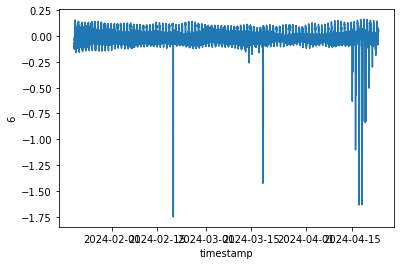

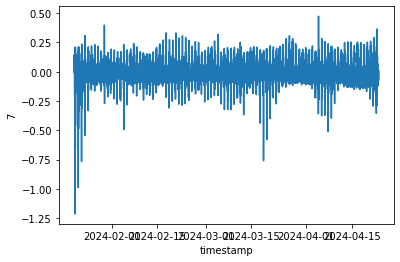

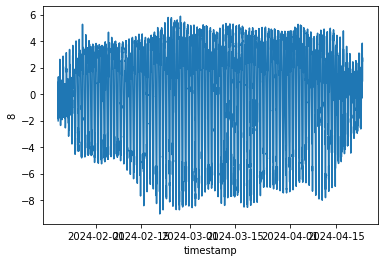

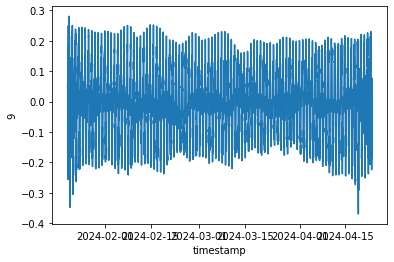

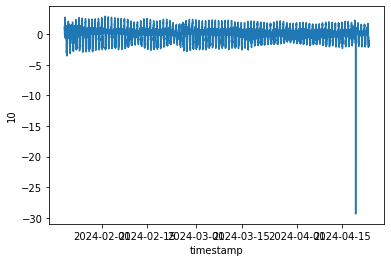

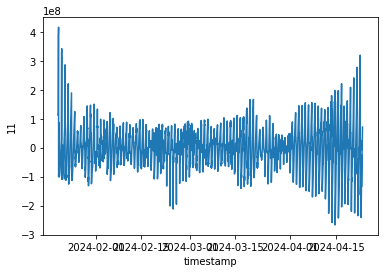

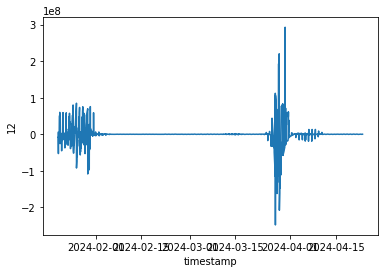

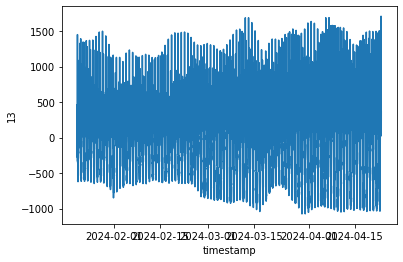

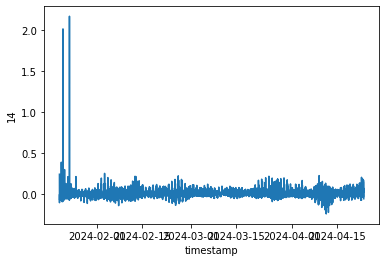

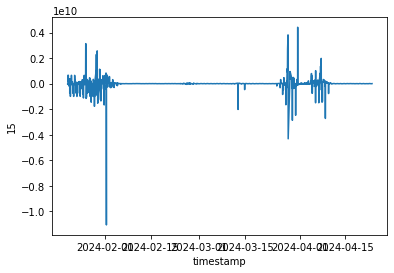

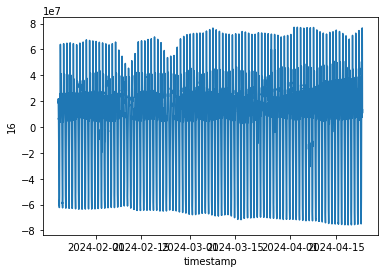

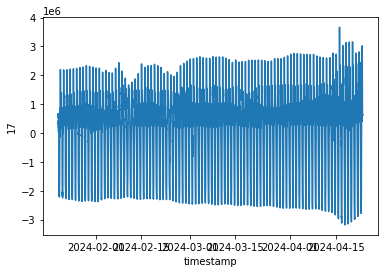

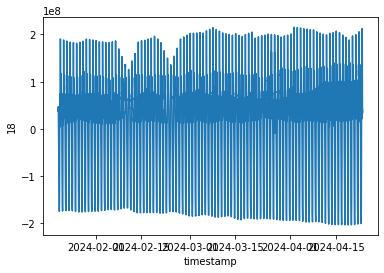

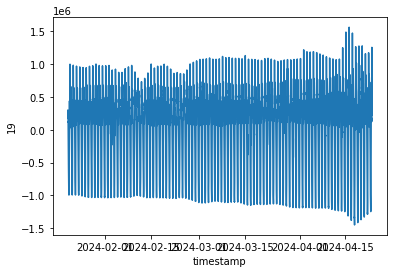

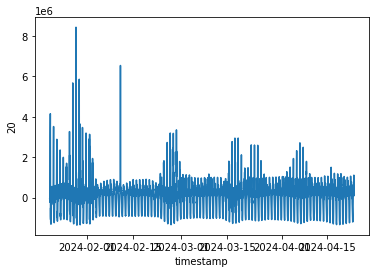

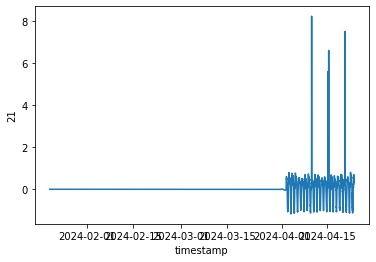

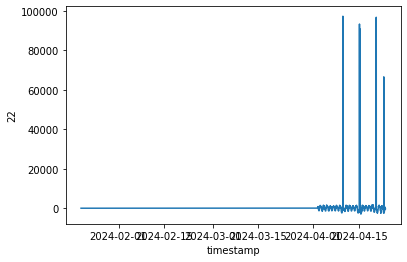

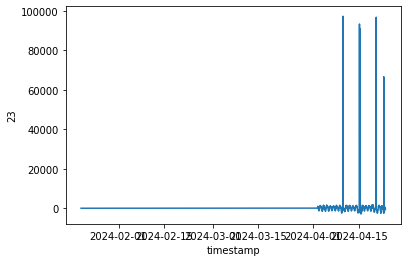

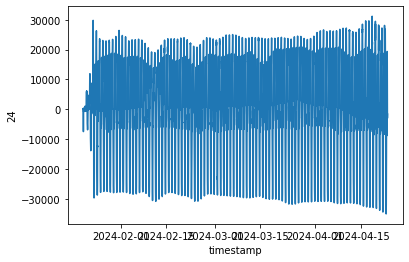

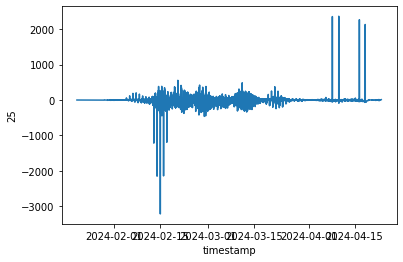

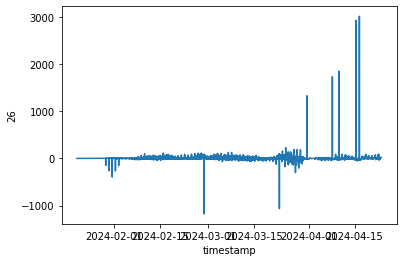

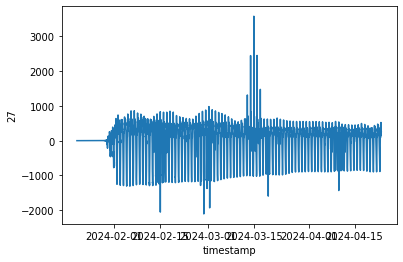

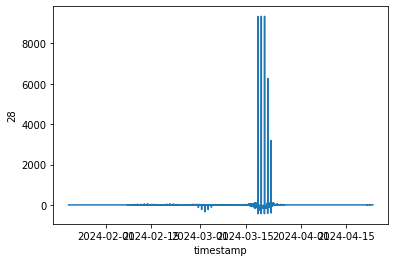

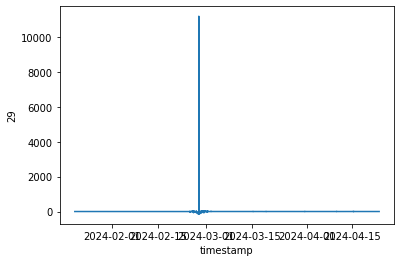

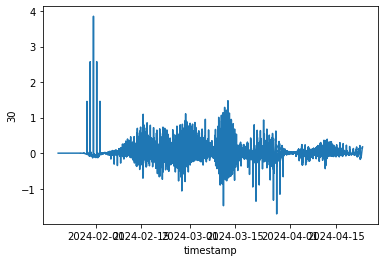

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_r is correctly populated with residuals from STL decomposition
for i, col in enumerate(df_s.columns):
    plt.figure(i)
    sns.lineplot(x=df_s.index, y=df_s[col])

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
df_s = pd.DataFrame()
df_t = pd.DataFrame()
df_r = pd.DataFrame()
for col in df.columns:
    decomposition = seasonal_decompose(df[col].ffill().bfill(), period=96)
    df_s[col] = decomposition.seasonal
    df_t[col] = decomposition.trend
    df_r[col] = decomposition.resid


In [92]:
import plotly
fig = px.line(df_r, x=df_r.index, y=df_r.columns)
plotly.offline.plot(fig, filename='residual.html')

'residual.html'

In [93]:
import plotly
fig = px.line(df_s, x=df_s.index, y=df_s.columns)
plotly.offline.plot(fig, filename='seasonal.html')

'seasonal.html'

In [94]:
import plotly
fig = px.line(df_t, x=df_t.index, y=df_t.columns)
plotly.offline.plot(fig, filename='trend.html')

'trend.html'